# Extreme Learning Machine

This is a quick example of an Extreme Learning Machine implementation/solution to the MNIST handwritten digit digital recognizer problem.

I chose this dataset since a high accuracy on MNIST is regarded as a basic requirement of credibility in a classification algorithm.

Extreme learning machines are feedforward neural networks, that can be extremely easy to implement and offer decent results, considering the speed and simplicity of this algorithm compared to more complex solutions.

# Reading the MNIST dataset
The MNIST dataset contains a series of monochrome images 28x28 of handwritten digits, on each row of the dataset stored as a vector with 784 values, each representing a pixel value, the training data has an additional column containing the label associated with each image.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train = pd.read_csv("train.csv")
#train.head()

Each row has 785 columns, with the first being the label and the rest of them representing the pixel values (28x28) of the image.

Next is to separate the labels from the pixel values.

In [2]:
x_train = train.iloc[:, 1:].values.astype('float32')
labels = train.iloc[:, 0].values.astype('int32')

Plot of first 5 images from the dataset to better visualize the data.

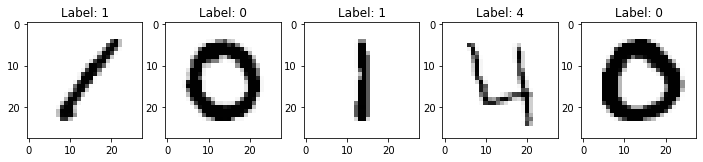

In [3]:
fig = plt.figure(figsize=(12, 12))
for i in range(5):
    fig.add_subplot(1, 5, i+1)
    plt.title('Label: {label}'.format(label=labels[i]))
    plt.imshow(x_train[i].reshape(28, 28), cmap='Greys')

Since this is a multiclass classification problem, we will One Hot Encode the labels. This simply means that we will use vectors to represent each class, instead of the label value. Each vector contains the value 1 at the index corresponding to the class it represents, with the rest of the values set to 0.

In [4]:
CLASSES = 10
y_train = np.zeros([labels.shape[0], CLASSES])
for i in range(labels.shape[0]):
        y_train[i][labels[i]] = 1
y_train.view(type=np.matrix)

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

The next step is to split the data into training and testing parts, since we would like to test our accuracy of our model at the end. We will use around 10% of our training data for testing.

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
print('Train size: {train}, Test size: {test}'.format(train=x_train.shape[0], test=x_test.shape[0]))
print(f"Train labels:\n{y_train}")
print(f"Test labels:\n{y_test}")

Train size: 33600, Test size: 8400
Train labels:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]
Test labels:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
x_test, x_vad, y_test, y_vad = train_test_split(x_test, y_test, test_size=0.2)
print('Validation size: {train}, Test size: {test}'.format(train=x_vad.shape[0], test=x_test.shape[0]))
print(f"Validation labels:\n{y_vad}")
print(f"Test labels:\n{y_test}")

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_vad = X[train_index], X[test_index] 

In [ ]:
y_train, y_test = y[0,train_index], y[1,test_index]

In [ ]:
data=train
kfold = KFold(2, True, 3)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
model = svm.SVC()
score = model.decision_function(x_test, y_test)
print('Test accuracy:', score[1])

Now, our data is ready for both training and testing our neural network. Next, we will take a look at the implementation of the Extreme Learning Machine.

# Extreme Learning Machine implementation
The ELM algorithm is similar to other neural networks with 3 key differences:

The number of hidden units is usually larger than in other neural networks that are trained using backpropagation.
The weights from input to hidden layer are randomly generated, usually using values from a continuous uniform distribution.
The output neurons are linear rather than sigmoidal, this means we can use least square errors regression to solve the output weights.
Let's start by defining some constants and generate the input to hidden layer weights:

In [6]:
INPUT_LENGHT = x_train.shape[1] # 784 
HIDDEN_UNITS = 1000

Win = np.random.normal(size=[INPUT_LENGHT, HIDDEN_UNITS])
print('Input Weight shape: {shape}'.format(shape=Win.shape))

Input Weight shape: (784, 1000)


The next step is to compute our hidden layer to output weights. This is done in the following way:

Compute the dot product between the input and input-to-hidden layer weights, and apply some activation function. Here we will use ReLU, since it is simple and in this case it gives us a good result:

In [7]:
def input_to_hidden(x):
    a = np.dot(x, Win)
    a = np.maximum(a, 0, a) # ReLU
    return a

Compute output weights, this is a standard least square error regression problem, since we try to minimize the least square error between the predicted labels and the training labels. The solution to this is:
                           
Where X is our input to hidden layer matrix computed using the function from the previous step, and y is our training labels.

In [8]:
X = input_to_hidden(x_train)
Xt = np.transpose(X)
Wout = np.dot(np.linalg.inv(np.dot(Xt, X)), np.dot(Xt, y_train))
print('Output weights shape: {shape}'.format(shape=Wout.shape))

Output weights shape: (1000, 10)


Now that we have our trained model, let's create a function that predicts the output, this is done simply by computing the dot product between the result from the input_to_hidden function we defined earlier, with the output weights:

In [9]:
def predict(x):
    x = input_to_hidden(x)
    y = np.dot(x, Wout)
    return y

Next, we can test our model:

In [10]:
y = predict(x_test)
correct = 0
total = y.shape[0]
for i in range(total):
    predicted = np.argmax(y[i])
    test = np.argmax(y_test[i])
    correct = correct + (1 if predicted == test else 0)
print('Accuracy: {:f}'.format(correct/total))

Accuracy: 0.934524
